# No-show Appointments Dataset
## by Salman Fari

# Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). A number of characteristics about the patient are included in each row. <li> ScheduledDay: tells us on what day the patient set up their appointment.
<li> Neighborhood: indicates the location of the hospital.
<li> Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<li> Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Assessing Data
## Visual Assessment

In [4]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Programmatic Assessment

In [5]:
#check the number of rows and columns
df.shape

(110527, 14)

In [6]:
#Show important information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#descriptive information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37 <br>
Maximum age is 115 <br>
minimum age is -1 which does not make sense

In [22]:
#check for missing values

In [23]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [25]:
#check for duplicates
df.duplicated().sum()

0

# Data Cleaning
Tidiness issues
<li> Unrequired columns for our analysis (patient ID, Appointment ID, Scheduled Day and Appointment Day) <br>
Quality issues
<li> Hipertension column is spelled wrongly 
<li> No-show columm name is spelled wrongly
<li> Handcap column is spelled wrongly

<br>
    
Quality Issues
<li> Gender, No-show are not in categorical format
<li> A row contains negative age

In [8]:
#make a copy of the dataset
df_clean = df.copy()

## Cleaning Tidiness issues


## `T1`: Unrequired columns for our analysis (patient ID, Appointment ID, Scheduled Day and Appointment Day) 


### Define
Drop all unrequired columns

### Code

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
df_clean.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

### Test

In [13]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## `T2`: Hipertension column is spelled wrongly


### Define
Rename hipertension column to hypertension

### Code

In [15]:
df_clean.rename(columns = {'Hipertension':'Hypertension'}, inplace=True)

### Test

In [16]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## `T3`: No-show column is not spelled correctly


### Define
Rename No-show column to No_show

### Code

In [17]:
df_clean.rename(columns = {'No-show':'No_show'}, inplace=True)

### Test

In [18]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## `T4`: Handcap column is spelled wrongly


### Define
Rename Handcap to Handicap

### Code

In [79]:
df_clean.rename(columns = {'Handcap':'Handicap'}, inplace=True)

In [80]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## `Q1`: Gender, No_show are not in categorical format


### Define
Convert Gender and No_show column to categorical format

### Code

In [20]:
df_clean['Gender'] = df_clean.Gender.astype('category')
df_clean['No_show'] = df_clean['No_show'].astype('category')

### Test

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110527 non-null  category
 1   Age            110527 non-null  int64   
 2   Neighbourhood  110527 non-null  object  
 3   Scholarship    110527 non-null  int64   
 4   Hypertension   110527 non-null  int64   
 5   Diabetes       110527 non-null  int64   
 6   Alcoholism     110527 non-null  int64   
 7   Handcap        110527 non-null  int64   
 8   SMS_received   110527 non-null  int64   
 9   No_show        110527 non-null  category
dtypes: category(2), int64(7), object(1)
memory usage: 7.0+ MB


## `Q2`: A row contains negative age


### Define
Drop rows with negative age

### Code

In [26]:
#checking index of row with negative age value
df_clean.query('Age < 0')

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [27]:
#dropping row with negative age using row index
df_clean.drop([99832],inplace=True)

### Test

In [28]:
#checking index of row with negative age value
df_clean.query('Age < 0')

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


# Explanatory Data Analysis

### General Overview of the Dataset

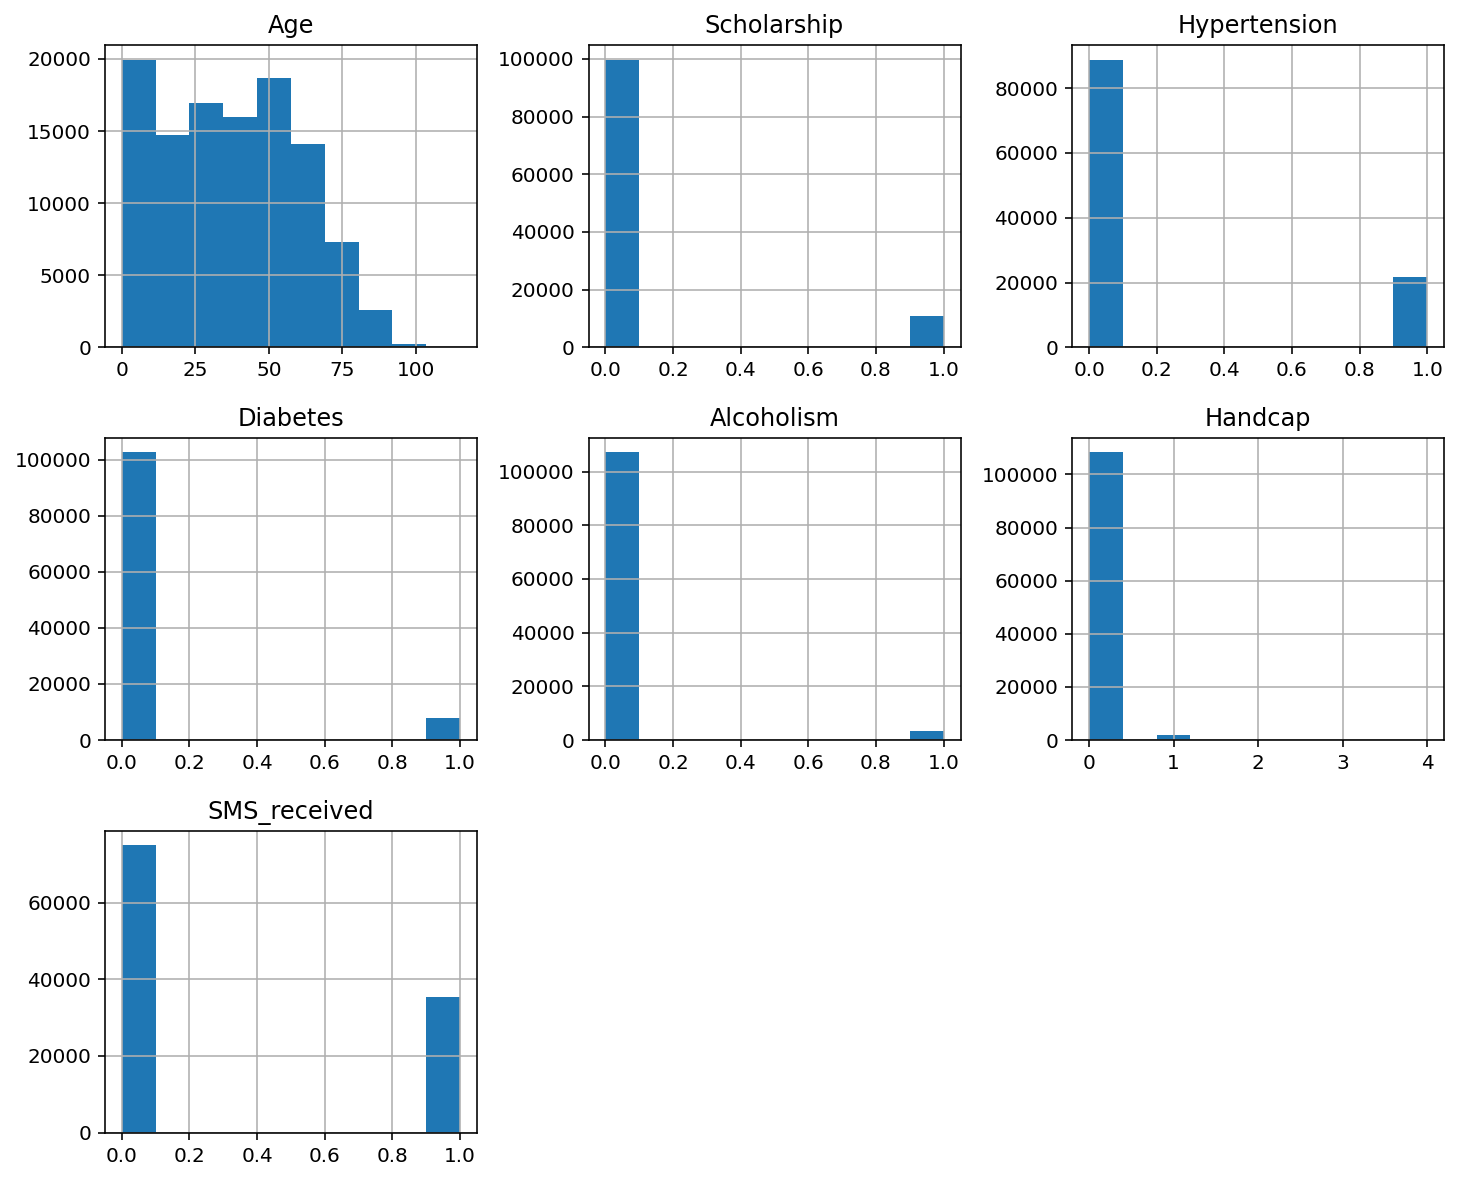

In [30]:
df_clean.hist(figsize=(12,10));

<li> Most patients do not suffer from chronic diseases
<li> All most all of the patients are not handicap
<li> Those patients who did not receive sms are twice the number of those who did not receive sms
<li> Only small number of patients (About 9%) are enrolled in the Brasilian welfare program

# What is the distribution of Gender?

In [31]:
#Create a function to plot the title and label of a plot
def x_y_t(xL,yL,title):
    plt.title(title, fontweight='bold', fontsize='14')
    plt.xlabel(xL, fontweight='bold')
    plt.ylabel(yL, fontweight='bold')
color = sns.color_palette()[0]

In [35]:
df_clean.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

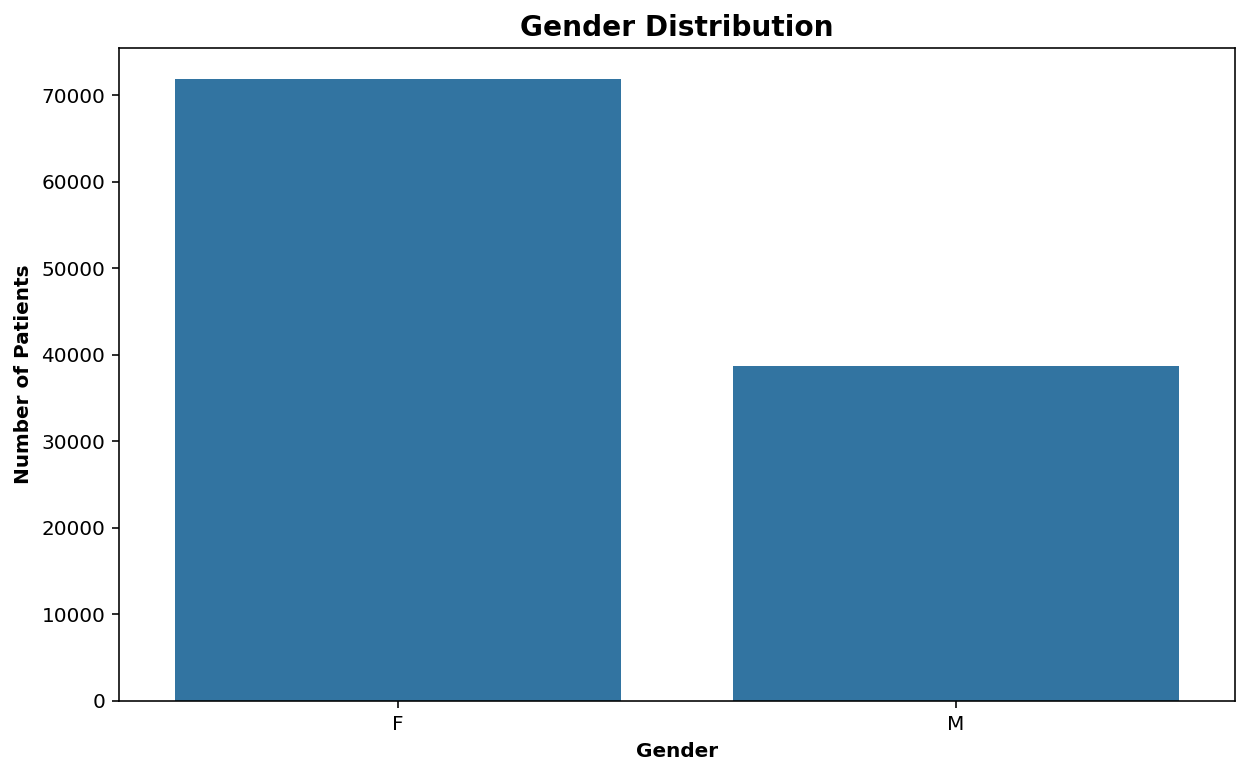

In [34]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Gender.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Gender', order=order, color=color);
x_y_t('Gender','Number of Patients', 'Gender Distribution')

There are more females than Male patients

# What is the Distribution of those that showed up for the Appointment?

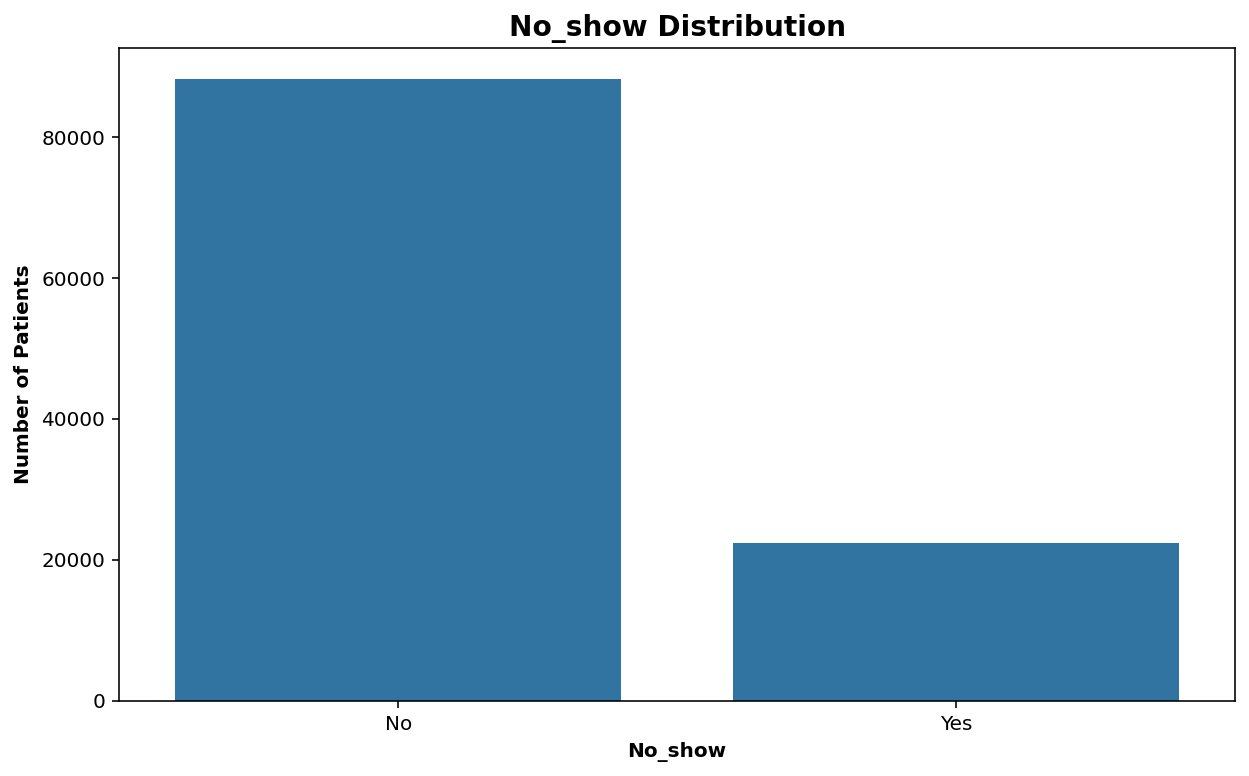

In [36]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.No_show.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='No_show', order=order, color=color);
x_y_t('No_show','Number of Patients', 'No_show Distribution')

In [37]:
df_clean.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

Most patients showed up for the appointment. 88207 patients showed up for their appointment and 22319 patients did not show up

# What is the Distribution of Age?

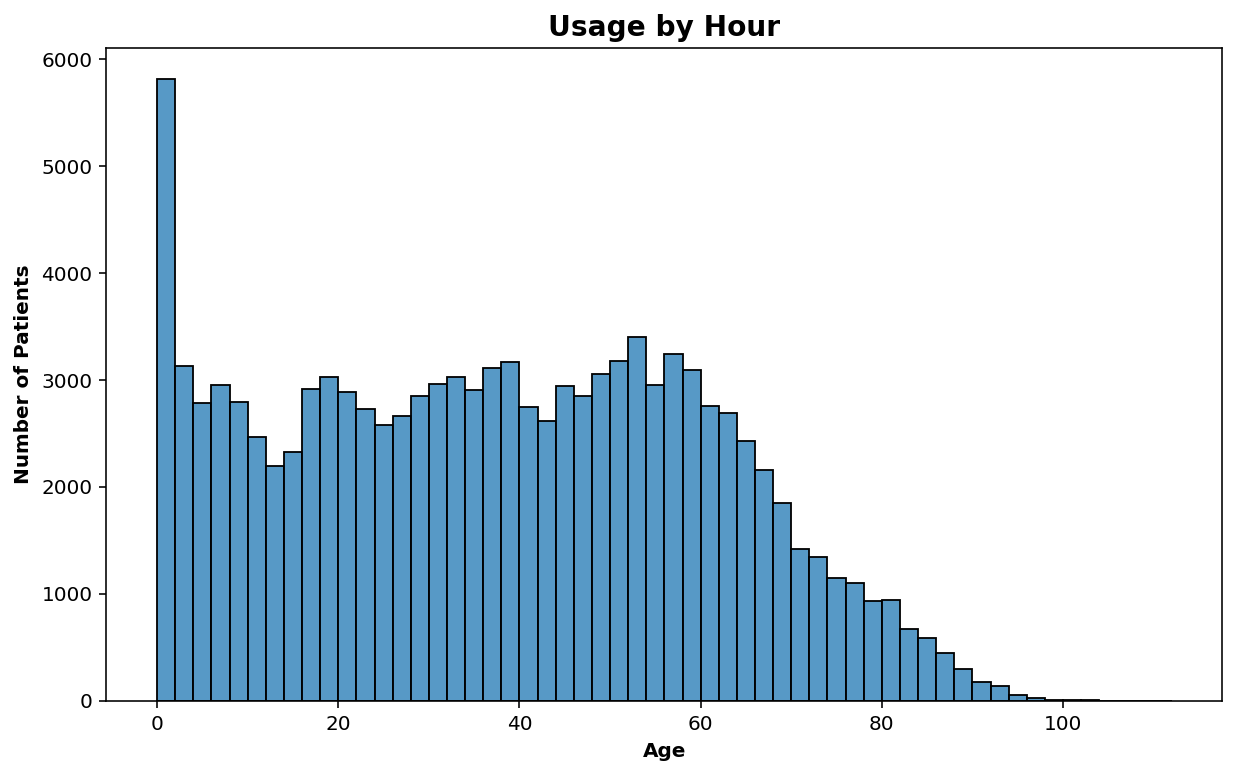

In [45]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

#plot the bar chart on 'start_hour'
bins = np.arange(0, 113, 2)
sns.histplot(data=df_clean, x='Age', color=color, bins=bins);
#Set the title and labels
x_y_t('Age', 'Number of Patients', 'Usage by Hour');

Most of the ages is around 0-60

In [47]:
#assigning names to show and no show
show = df_clean.No_show == 'No'
no_show = df_clean.No_show == 'Yes'

In [52]:
df_clean[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [54]:
df_clean[no_show].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

In [63]:
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# What is the Distribution of Scholarship?

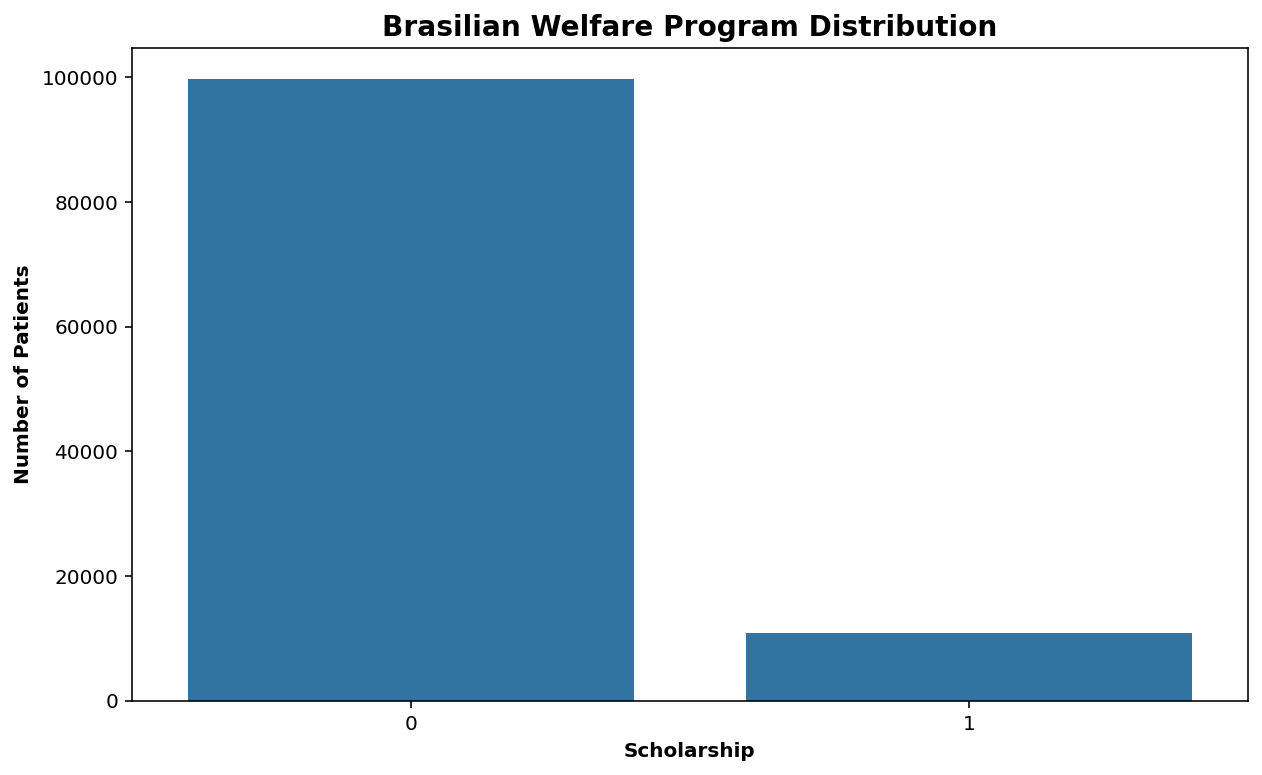

In [64]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Scholarship.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Scholarship', order=order, color=color);
x_y_t('Scholarship','Number of Patients', 'Brasilian Welfare Program Distribution')

Most patients were not enrolled in the welfare program

# What is the distribution of Hypertension?

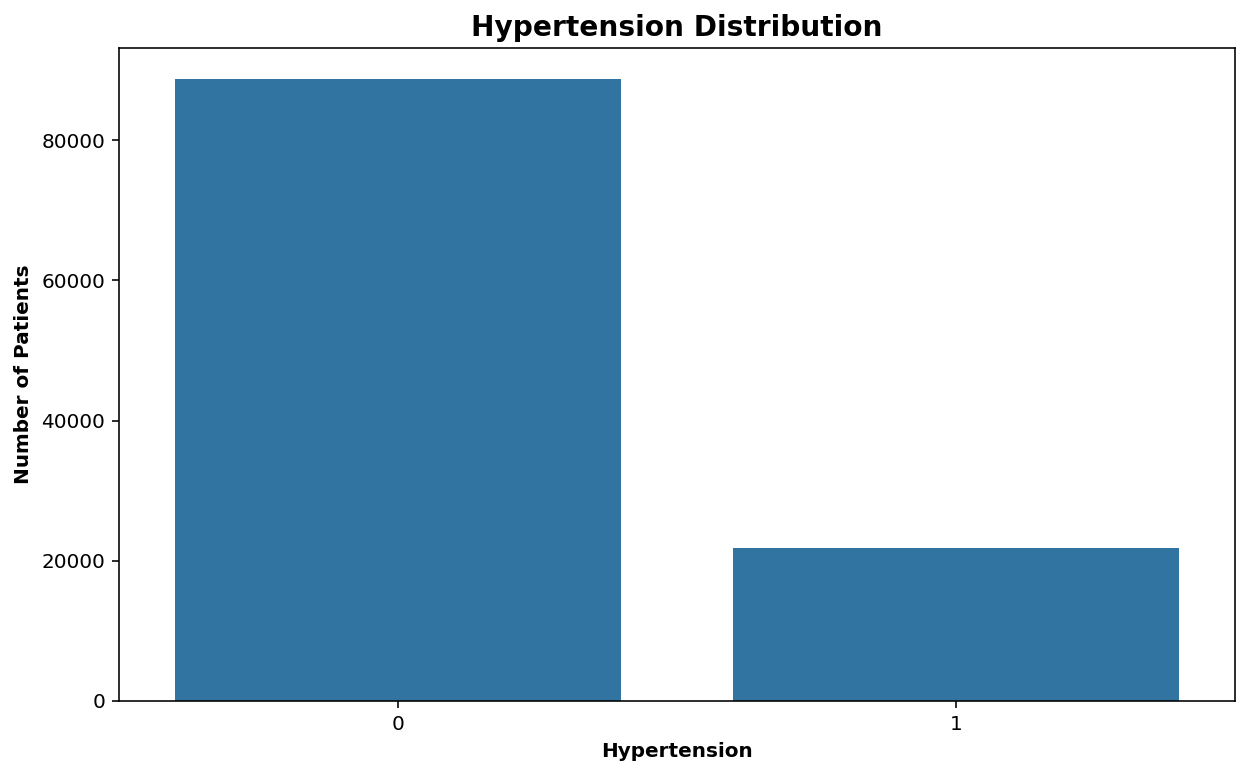

In [65]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Hypertension.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Hypertension', order=order, color=color);
x_y_t('Hypertension','Number of Patients', 'Hypertension Distribution')

Most of the patients were not Hypertensive 

# What is the distribution Diabetes?

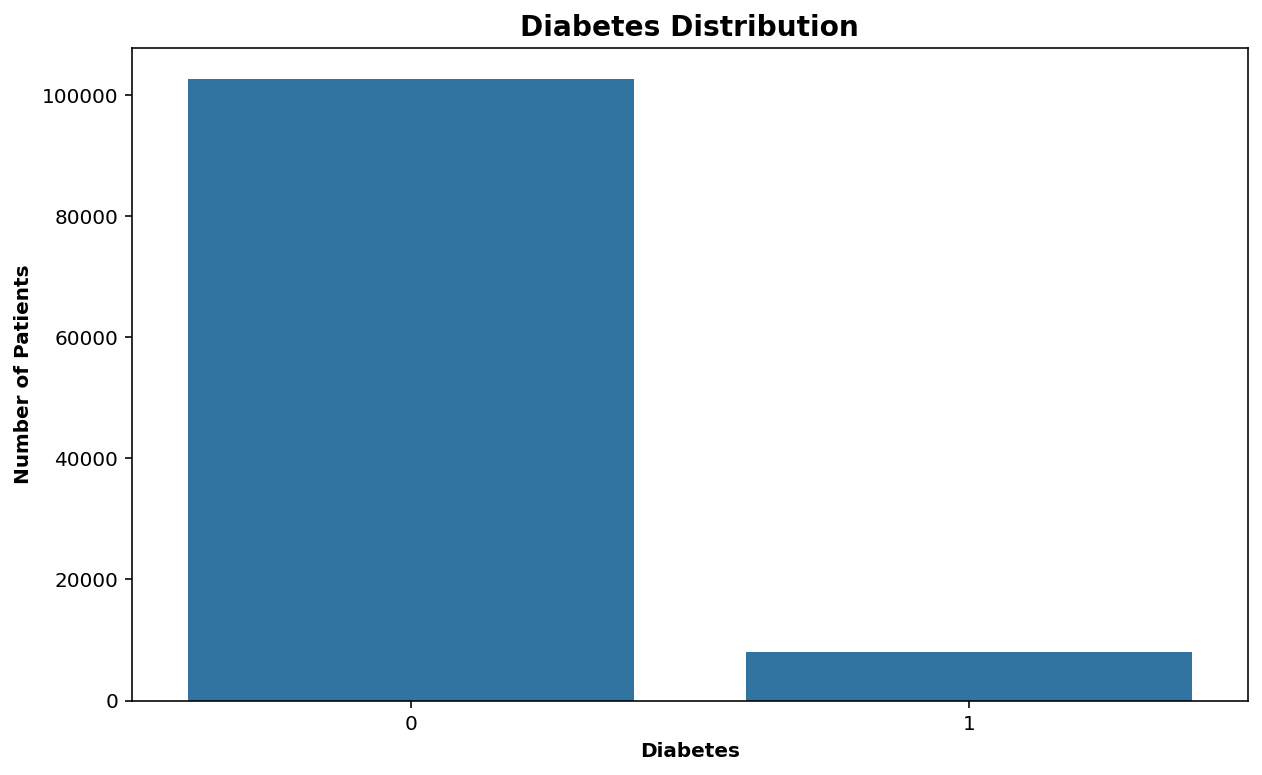

In [66]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Diabetes.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Diabetes', order=order, color=color);
x_y_t('Diabetes','Number of Patients', 'Diabetes Distribution')

Most patients did not have diabetes

# What is the Distribution of Alcoholism?

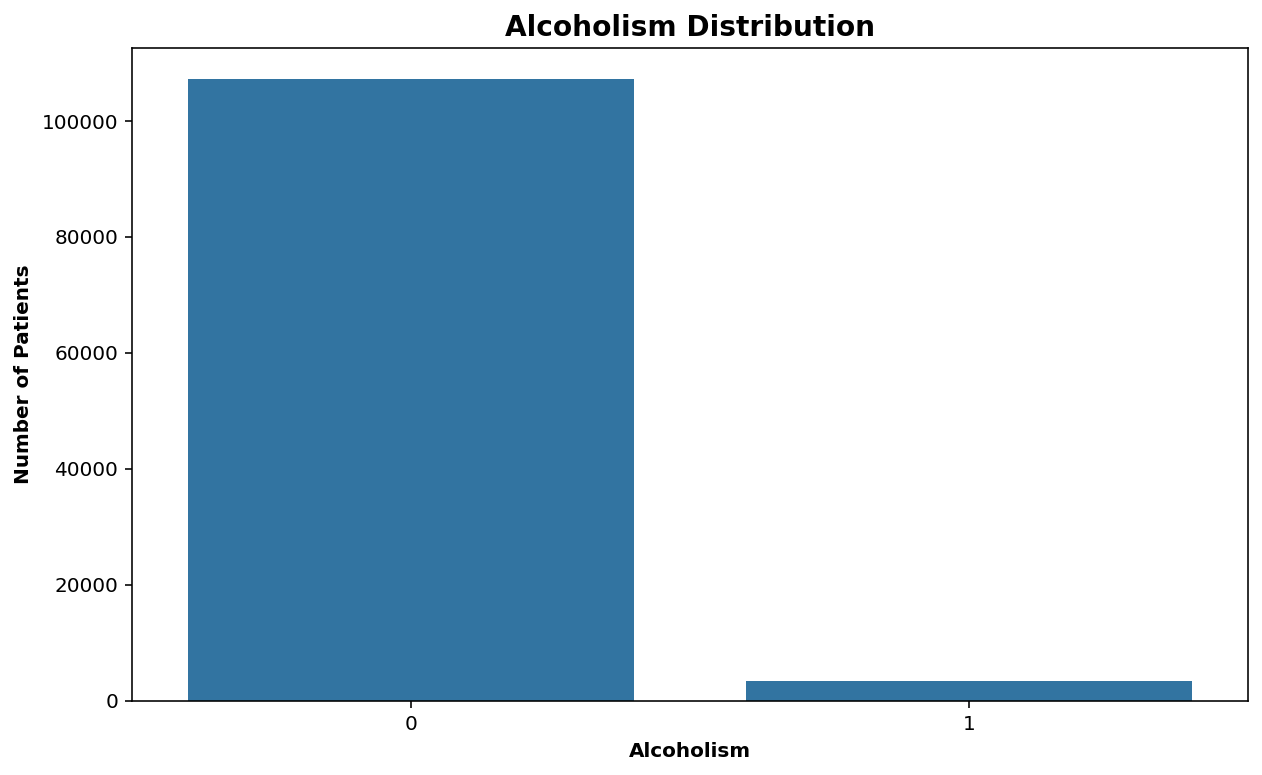

In [67]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Alcoholism.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Alcoholism', order=order, color=color);
x_y_t('Alcoholism','Number of Patients', 'Alcoholism Distribution')

Most of the patients were not alcoholic

# What is the Distribution of Handicap?

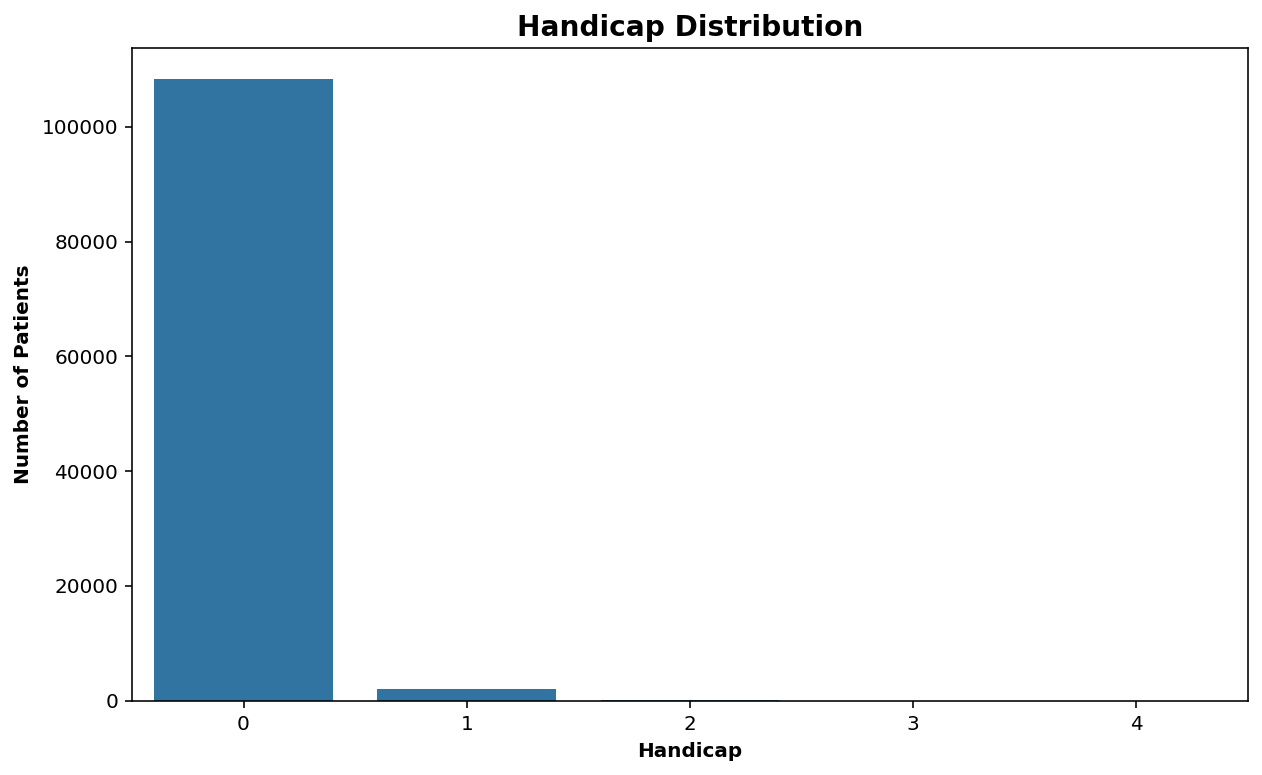

In [81]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.Handicap.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='Handicap', order=order, color=color);
x_y_t('Handicap','Number of Patients', 'Handicap Distribution')

Most of the patients were not handicap

# What is the Distribution of SMS Received?

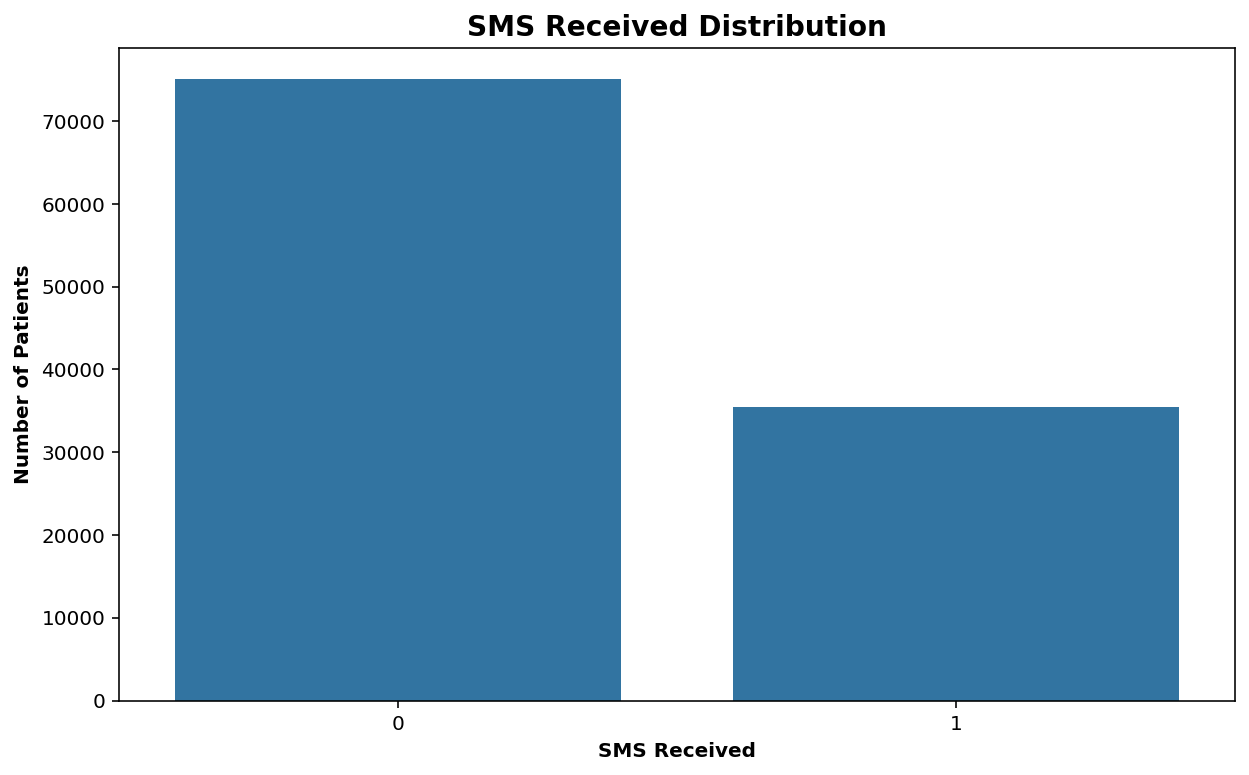

In [70]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.SMS_received.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='SMS_received', order=order, color=color);
x_y_t('SMS Received','Number of Patients', 'SMS Received Distribution')

Majority of the patients did not receive sms

# What is the Distribution between No_show and Gender?

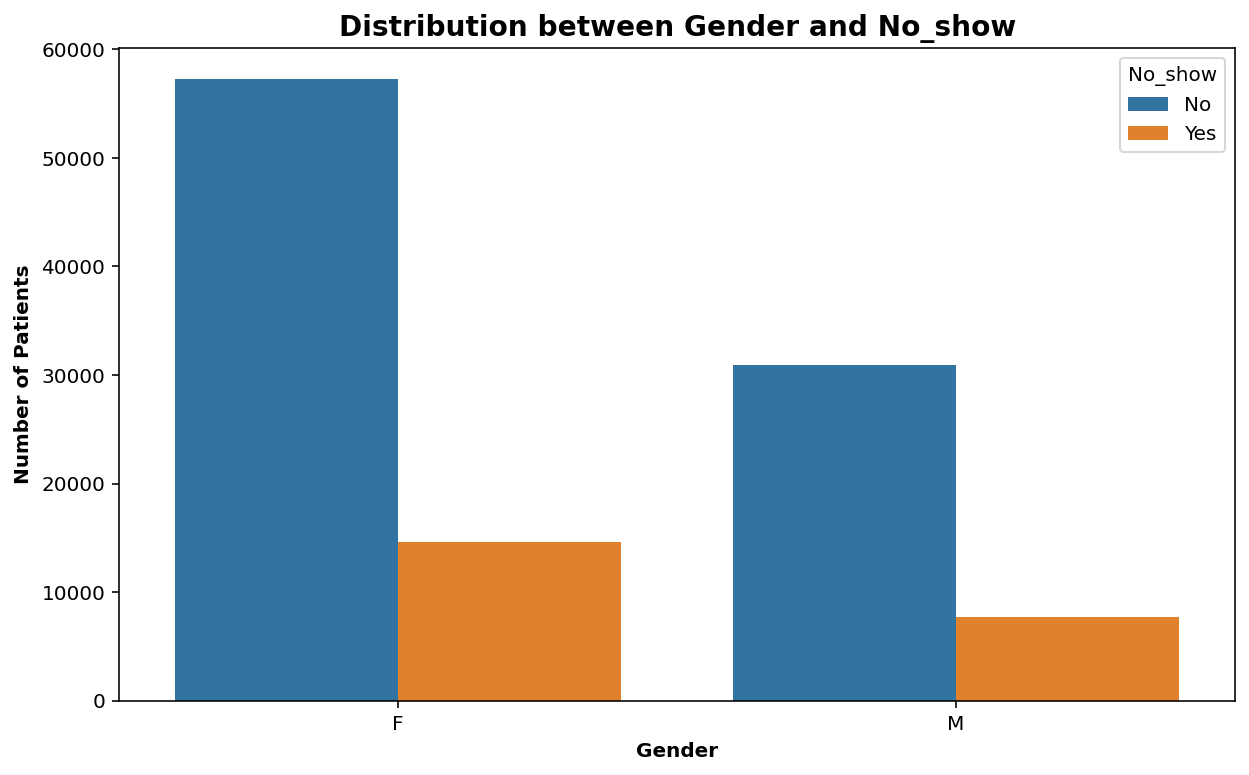

In [59]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'Gender' by 'No_show'
sns.countplot(data=df_clean, x='Gender', hue='No_show')
x_y_t('Gender', 'Number of Patients', 'Distribution between Gender and No_show')

Gender is insignificant. Female who showed up were more than males who did, and female who did not show up were also more than male.

# What is the Relationship between Brasilian Welfare Program and No_show?

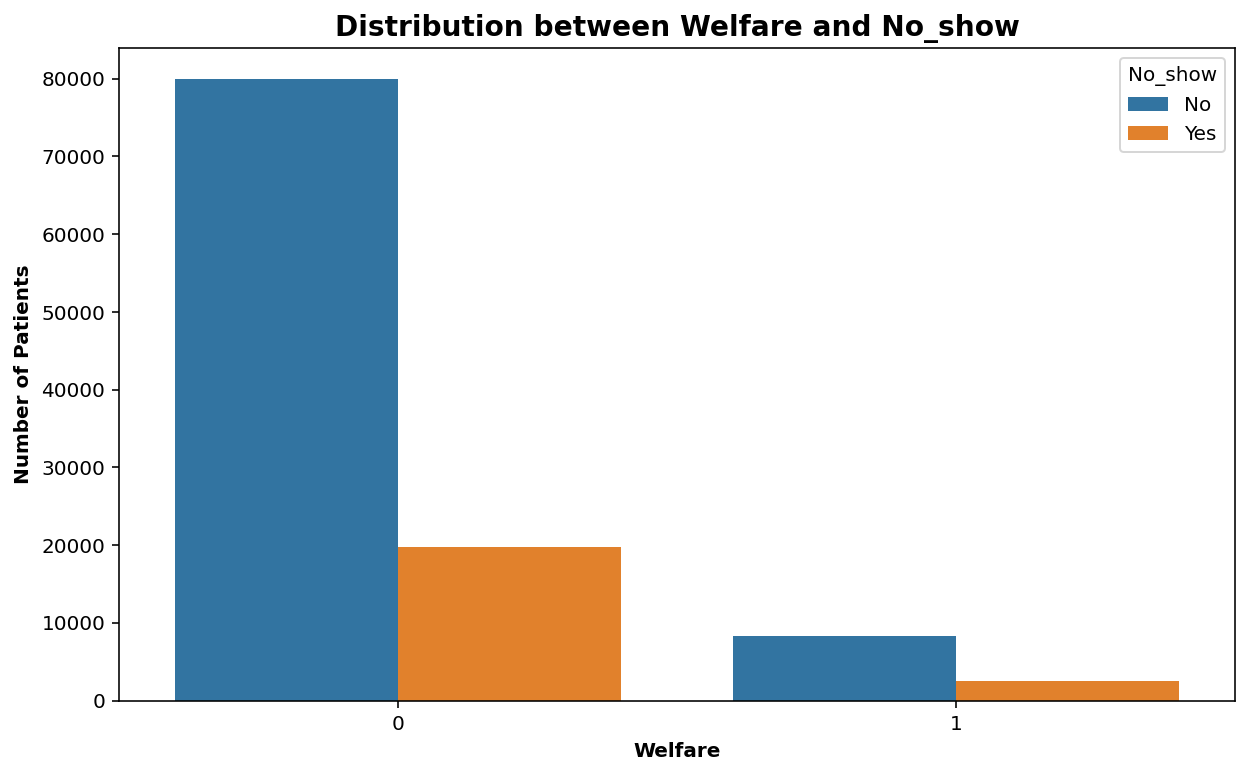

In [61]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'scholarship' by 'No_show'
sns.countplot(data=df_clean, x='Scholarship', hue='No_show')
x_y_t('Welfare', 'Number of Patients', 'Distribution between Welfare and No_show')

Majority of patients showed up for each scholarship status

# What is the Relationship between Hypertension and No_show?

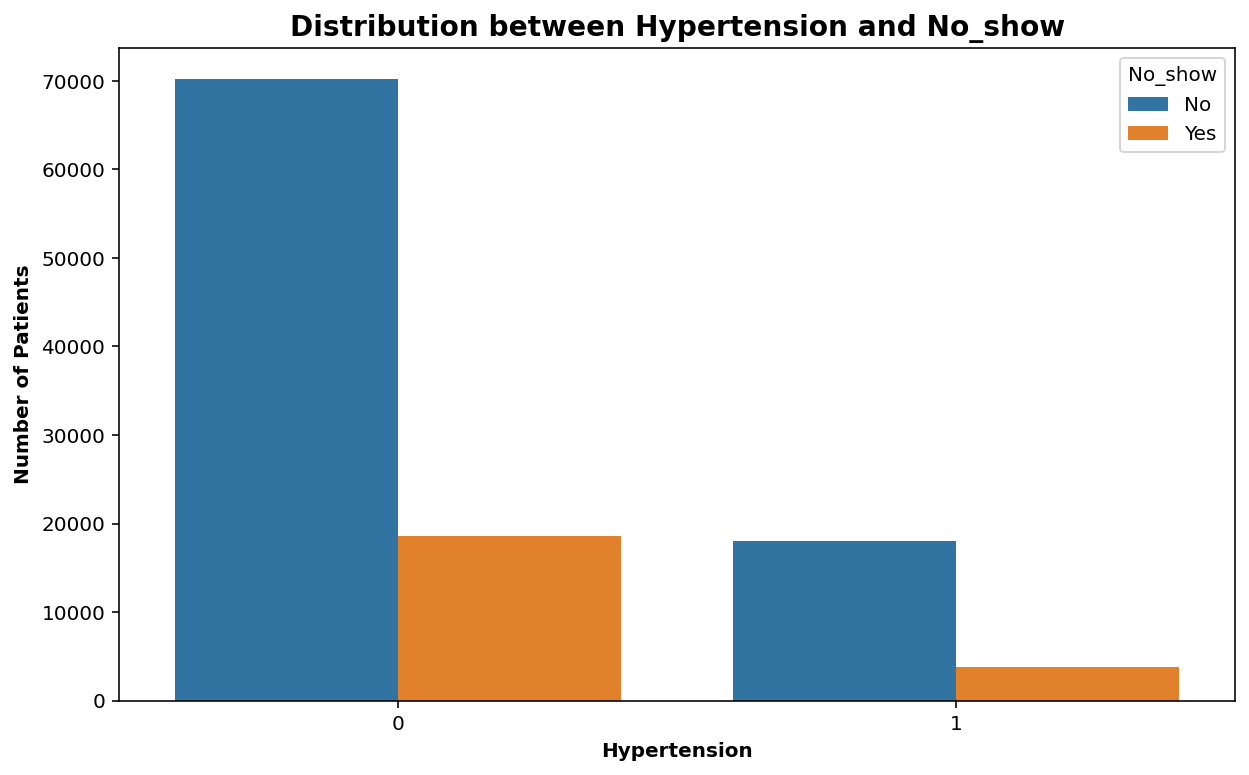

In [62]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'Hypertension' by 'No_show'
sns.countplot(data=df_clean, x='Hypertension', hue='No_show')
x_y_t('Hypertension', 'Number of Patients', 'Distribution between Hypertension and No_show')

# What is the Distribution between Scholarship and No_show?

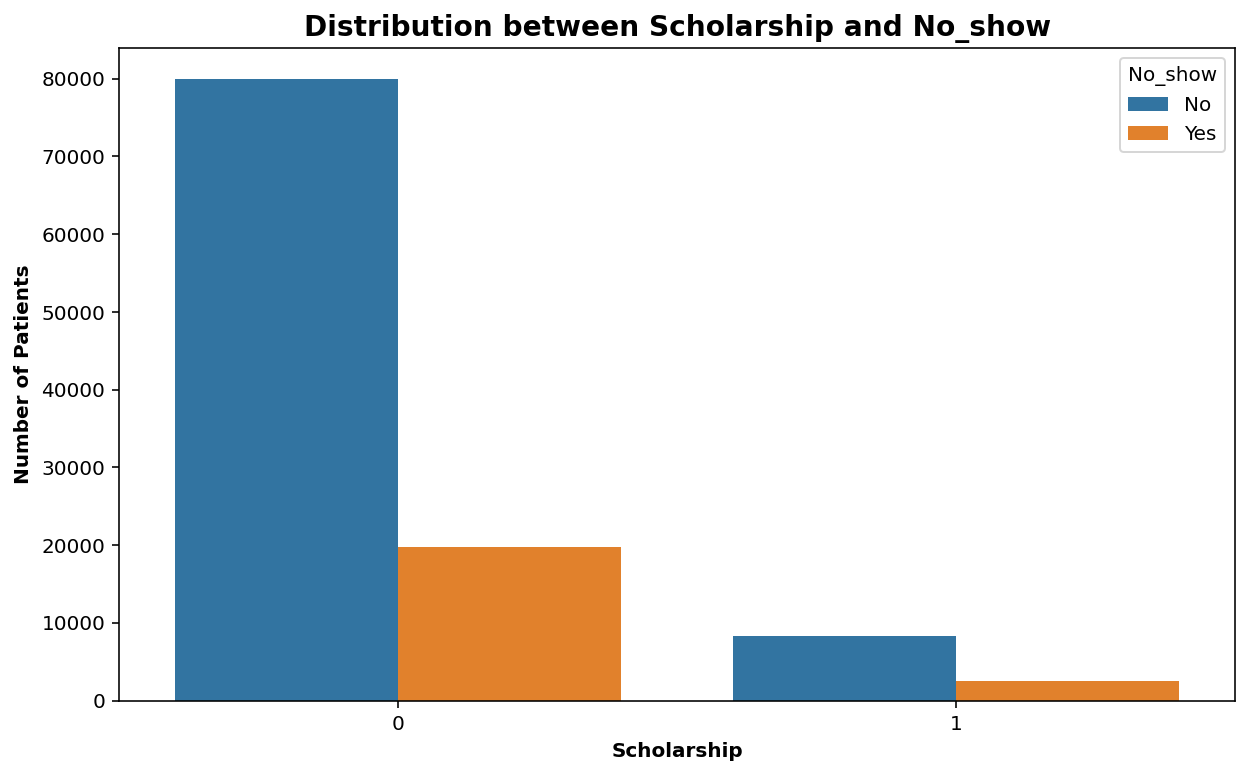

In [71]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'scholarship' by 'No_show'
sns.countplot(data=df_clean, x='Scholarship', hue='No_show')
x_y_t('Scholarship', 'Number of Patients', 'Distribution between Scholarship and No_show')

Scholarship is insignificant because for each scholarship status, majority of patients showed up

# What is the Relationship between SMS Received and No_show?

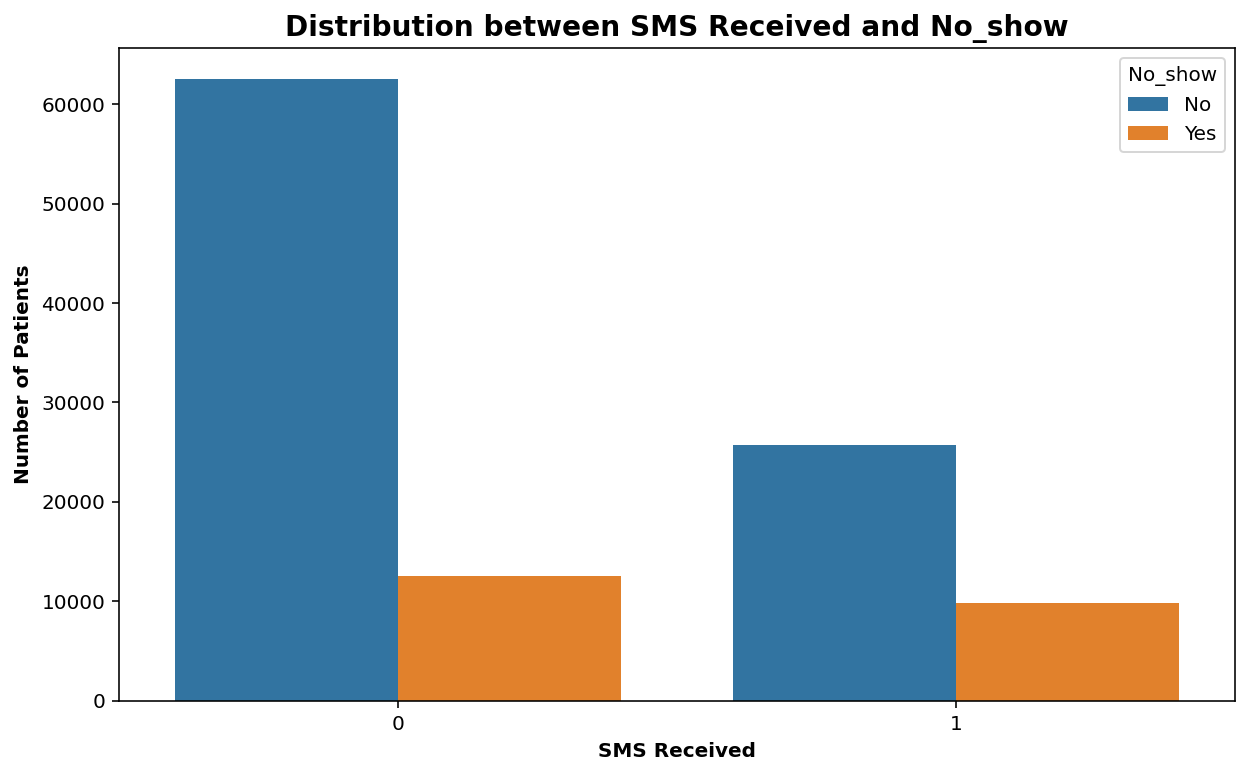

In [72]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the bar plot of 'SMS received' by 'No_show'
sns.countplot(data=df_clean, x='SMS_received', hue='No_show')
x_y_t('SMS Received', 'Number of Patients', 'Distribution between SMS Received and No_show')

Majority of those that showed up did not receive sms. It’s a bit strange

# What is the Distribution between Age and No_show?

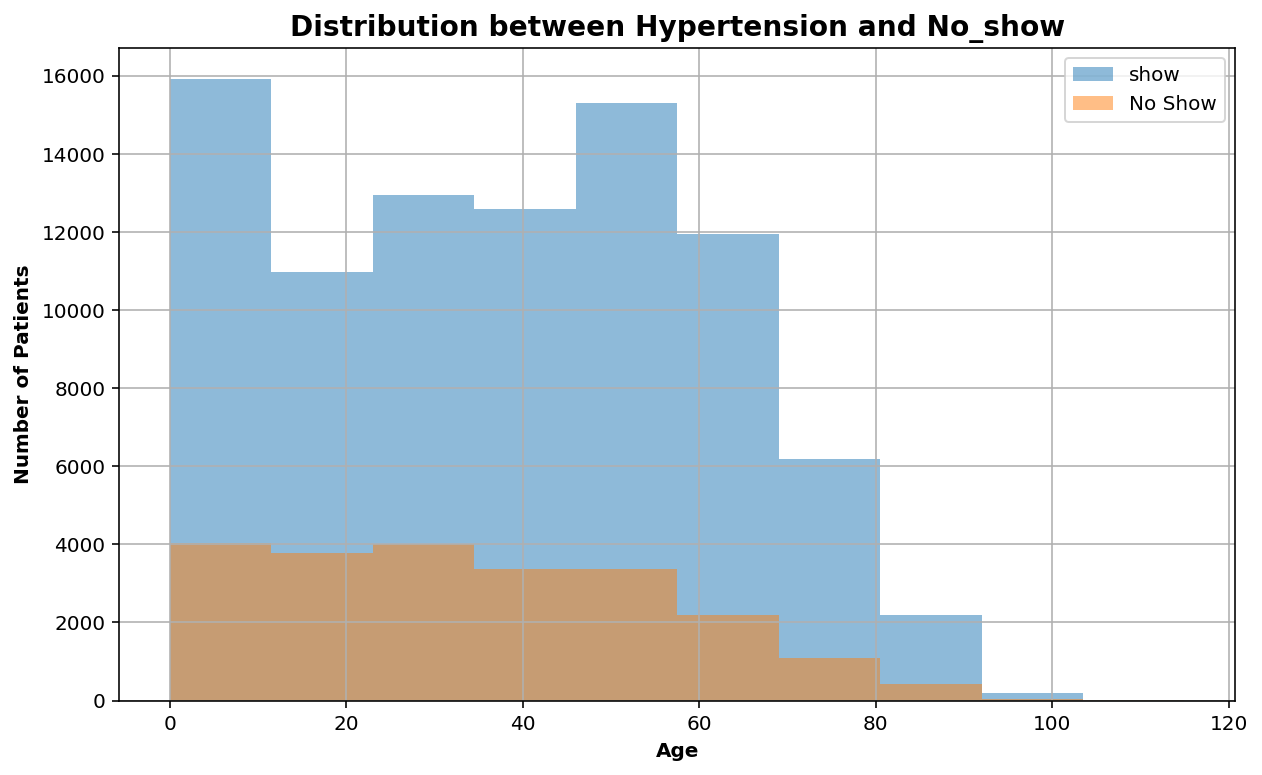

In [75]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the hist plot of 'Age' by 'No_show'
df_clean.Age[show].hist(alpha=0.5, label='show')
df_clean.Age[no_show].hist(alpha=0.5, label='No Show')
#show legend
plt.legend()
x_y_t('Age', 'Number of Patients', 'Distribution between Hypertension and No_show')

Patients in the age group of 0-10 showed more than all other group. The older a patient gets, the less they tend to get an appointment

# What is the Distribution between Neighbourhood and No_show?

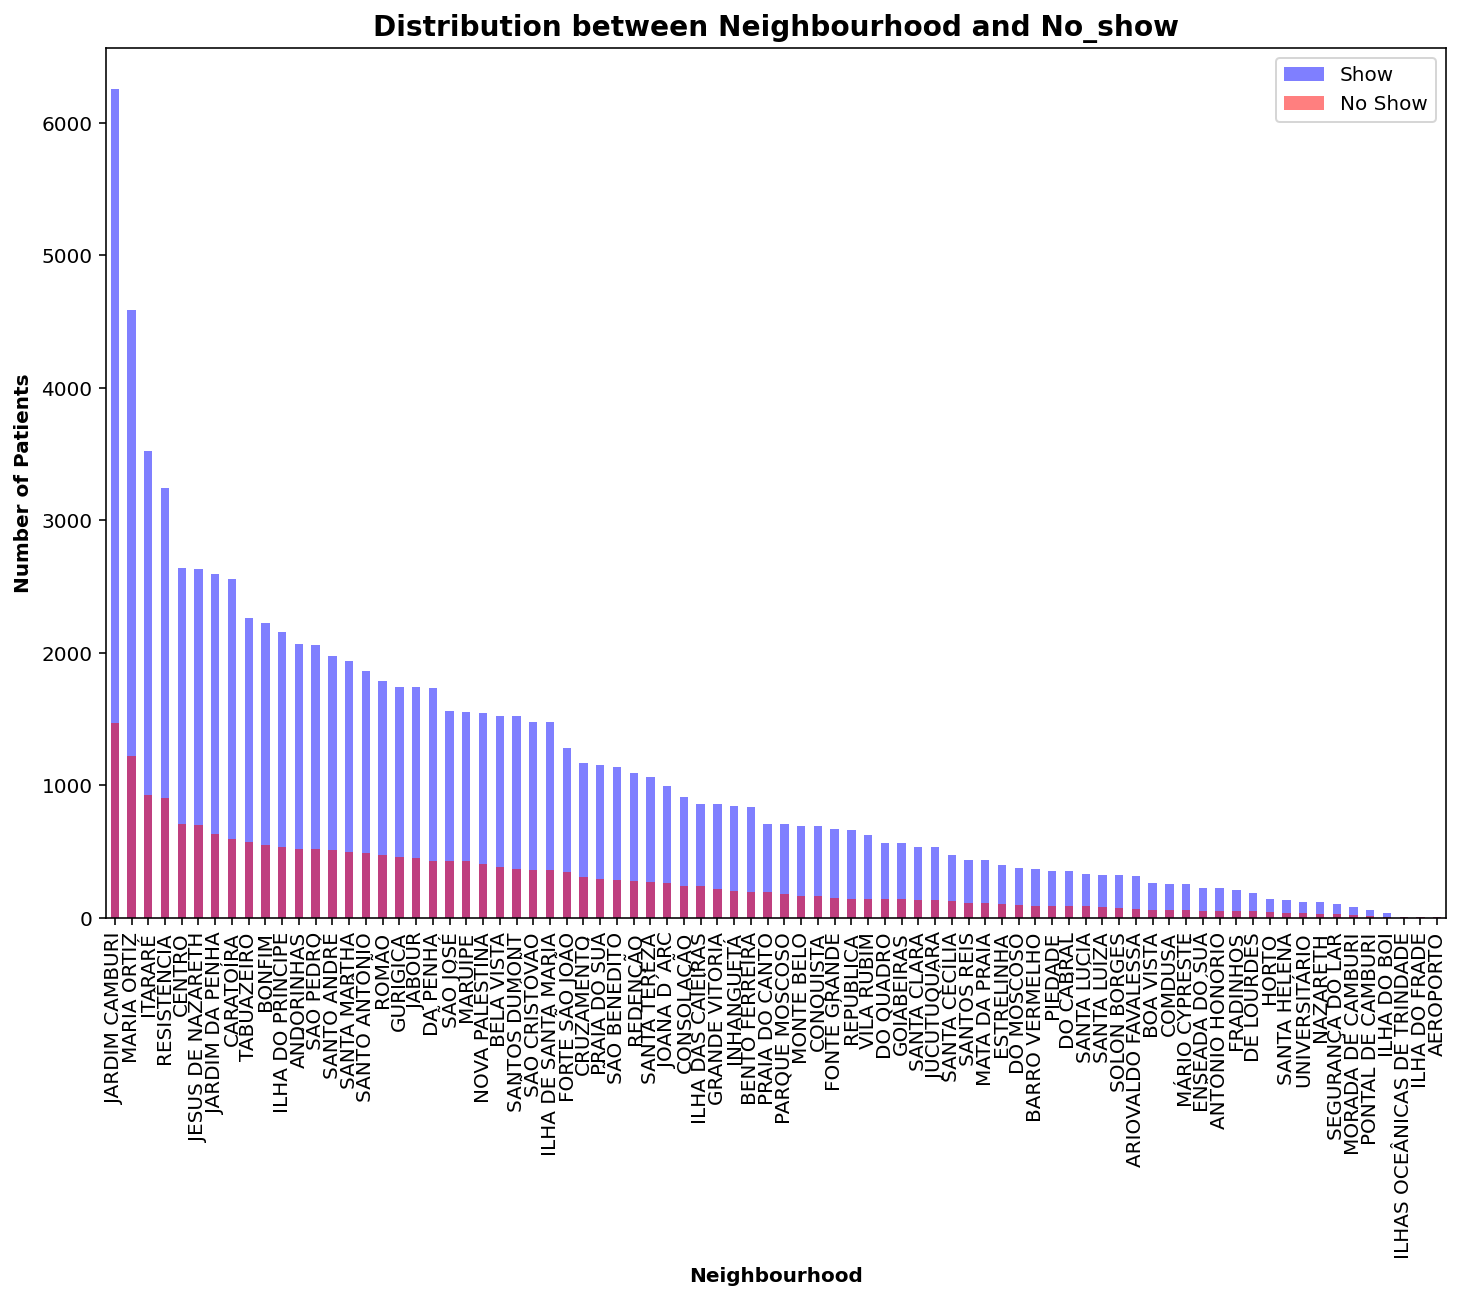

In [78]:
#Set a larger figure size for the plot
plt.figure(figsize=[12,8])
#Plot the bar plot of 'Neighbourhood' and 'No_show'
df_clean.Neighbourhood[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Show');
df_clean.Neighbourhood[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No Show');
#show legend
plt.legend()
x_y_t('Neighbourhood', 'Number of Patients', 'Distribution between Neighbourhood and No_show')

Neighbourhood is strongly affecting the showing up of a patient

# Conclusions
<br>
<li> Most patients that showed up for the appointment did not receive sms. Which is strange!
<li> Age played a big role as those in 0-10 age group were the most to show up, followed by the age group of 35-70
<li> At the end, Neighbourhood is strongly related to patients showing up at the clinic